In [1]:
#importing data
import numpy as np
import pandas as pd

url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'
dataset = pd.read_csv(url)
print(np.shape(dataset))
dataset.head()


(7525, 26)


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst


In [2]:
data = dataset.iloc[:49,:-1].values
label = dataset.iloc[:49,-1]
#-------------------------------Label Encoding--------------------------#
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df = dataset
label = df.iloc[:49,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["ROLE"])
numeric=y["ROLE"].unique() 
y1 = pd.DataFrame({'ROLE':original, 'Associated Number':numeric})
print(y1)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label)
y=pd.DataFrame(label,columns=["role"])
X = pd.DataFrame(data,columns=['sslc','hsc','cgpa','school_type','no_of_miniprojects','no_of_projects',
                                'coresub_skill','aptitude_skill','problemsolving_skill','programming_skill','abstractthink_skill',
                                'design_skill','first_computer','first_program','lab_programs','ds_coding','technology_used',
                                'sympos_attend','sympos_won','extracurricular','learning_style','college_bench','clg_teachers_know','college_performence','college_skills'])

                 ROLE  Associated Number
0   Technical Support                  4
1  Software Developer                  2
2      UI/UX Designer                  6
3        Data Analyst                  1
4    Technical Writer                  5
5       Web Developer                  7
6     Software Tester                  3
7    Business Analyst                  0


In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 2.101772
Feature 1: 0.955491
Feature 2: 1.599306
Feature 3: 1.769333
Feature 4: 3.316358
Feature 5: 1.125758
Feature 6: 1.299609
Feature 7: 6.225678
Feature 8: 1.013542
Feature 9: 1.529464
Feature 10: 6.433067
Feature 11: 3.607745
Feature 12: 0.611667
Feature 13: 1.566959
Feature 14: 0.907095
Feature 15: 4.838542
Feature 16: 1.000189
Feature 17: 2.309167
Feature 18: 2.526337
Feature 19: 3.994762
Feature 20: 3.109337
Feature 21: 0.519778
Feature 22: 0.356387
Feature 23: 0.116054
Feature 24: 5.677100


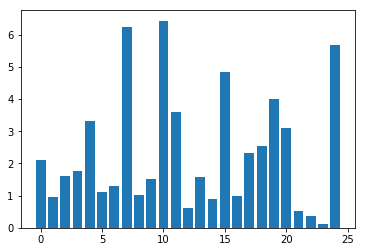

 The number of important features with threshold as 1 :19 
Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


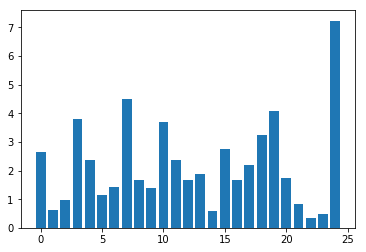

 The number of important features with threshold as 1 :19 


In [5]:
# feature selection
# example of chi squared feature selection for categorical data
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

count = 0
for i in fs1.scores_ : 
    if i > 1 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 1 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 1 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 1 :{} ".format(k3))

Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


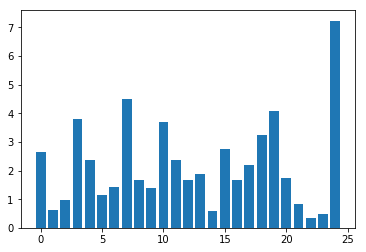

 The number of important features with threshold as 1 : 19


In [6]:
#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 1 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 1 : {}" .format(k5))